In [173]:
#Independent Data Science Project Part 3 by Zara Clacken

In [174]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')  
import numpy as np
import pandas as pd 

In [175]:
#Import Raw Data Set

educationraw = pd.read_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Raw Data/Student Race and Ethnicity.csv') 
educationraw.head(6)

,ID IPEDS Race,IPEDS Race,ID Year,Year,Completions,Geography,ID Geography,Slug Geography,share
0,asian,Asian,2017,2017,298112,United States,01000US,united-states,0.061655
1,black,Black or African American,2017,2017,576612,United States,01000US,united-states,0.119254
2,hawaiian,Native Hawaiian or Other Pacific Islanders,2017,2017,14034,United States,01000US,united-states,0.002902
3,hispanic,Hispanic or Latino,2017,2017,786273,United States,01000US,united-states,0.162616
4,multiracial,Two or More Races,2017,2017,141479,United States,01000US,united-states,0.029260
5,native,American Indian or Alaska Native,2017,2017,33272,United States,01000US,united-states,0.006881


In [176]:
#Is the data for the entire nation?
educationraw.Geography.unique()

array(['United States'], dtype=object)

In [177]:
#Print out the Columns List
educationraw.columns

Index(['ID IPEDS Race', 'IPEDS Race', 'ID Year', 'Year', 'Completions',
       'Geography', 'ID Geography', 'Slug Geography', 'share'],
      dtype='object')

In [178]:
#Drop Undesired Columns
education = educationraw.drop(['ID IPEDS Race','ID Year',
       'Geography', 'ID Geography', 'Slug Geography'], axis =1)
education.head(6)

,IPEDS Race,Year,Completions,share
0,Asian,2017,298112,0.061655
1,Black or African American,2017,576612,0.119254
2,Native Hawaiian or Other Pacific Islanders,2017,14034,0.002902
3,Hispanic or Latino,2017,786273,0.162616
4,Two or More Races,2017,141479,0.029260
5,American Indian or Alaska Native,2017,33272,0.006881


In [179]:
#Change column names
education.columns = ['Race', 'Year', 'DegreesCompleted', 'PercentofTotalDegrees']
education.head(6)

,Race,Year,DegreesCompleted,PercentofTotalDegrees
0,Asian,2017,298112,0.061655
1,Black or African American,2017,576612,0.119254
2,Native Hawaiian or Other Pacific Islanders,2017,14034,0.002902
3,Hispanic or Latino,2017,786273,0.162616
4,Two or More Races,2017,141479,0.029260
5,American Indian or Alaska Native,2017,33272,0.006881


---

In [180]:
#Multiply Total Degree Percentages by 100
education.PercentofTotalDegrees = (education.PercentofTotalDegrees)*100
education.head(6)

,Race,Year,DegreesCompleted,PercentofTotalDegrees
0,Asian,2017,298112,6.165503
1,Black or African American,2017,576612,11.925394
2,Native Hawaiian or Other Pacific Islanders,2017,14034,0.290249
3,Hispanic or Latino,2017,786273,16.261568
4,Two or More Races,2017,141479,2.926045
5,American Indian or Alaska Native,2017,33272,0.688126


---

In [181]:
#What are the unique races?
education.Race.unique().tolist()

['Asian',
 'Black or African American',
 'Native Hawaiian or Other Pacific Islanders',
 'Hispanic or Latino',
 'Two or More Races',
 'American Indian or Alaska Native',
 'Unknown',
 'White']

In [182]:
#Drop Rows where Race is Unknown 
index_Unknown = education[education.Race == 'Unknown'].index
education.drop(index_Unknown, inplace = True)
education.Race.unique().tolist()

['Asian',
 'Black or African American',
 'Native Hawaiian or Other Pacific Islanders',
 'Hispanic or Latino',
 'Two or More Races',
 'American Indian or Alaska Native',
 'White']

---

In [183]:
#Merge Asian plus Native Hawaiian or Other Pacific Islanders Degrees Completed into Asian and Pacific Islander Degrees Completed 

In [184]:
#Sum Asian plus Native Hawaiian or Other Pacific Islanders Degrees Completed 
yearlist = education.Year.unique()
AADegrees = []
PIDegrees = []
for Y in yearlist:
    AADegrees.append(np.array(education[education.Year == Y][education.Race == 'Asian'].DegreesCompleted))
    PIDegrees.append(np.array(education[education.Year == Y][education.Race == 'Native Hawaiian or Other Pacific Islanders'].DegreesCompleted))
    AAPIDegrees = np.add(AADegrees,PIDegrees)
AAPIDegrees.tolist()


[[312146], [298565], [288377], [279059], [272080], [261843]]

In [185]:
#Sum Asian plus Native Hawaiian or Other Pacific Islanders Percents 
yearlist = education.Year.unique()
AAPercent = []
PIPercent = []
for Y in yearlist:
    AAPercent.append(np.array(education[education.Year == Y][education.Race == 'Asian'].PercentofTotalDegrees))
    PIPercent.append(np.array(education[education.Year == Y][education.Race == 'Native Hawaiian or Other Pacific Islanders'].PercentofTotalDegrees))
    AAPIPercent = np.add(AAPercent,PIPercent)
print(AAPIPercent.tolist(), end =' ')

[[6.4557519999999995], [6.238032], [6.0810728], [5.975164400000001], [6.0174189], [5.893158699999999]] 

In [186]:
#Create an AAPI list to place into dictionary  

a = '"Asian and Pacific Islander"'
def AAPIfunc():
    counter = 0
    while counter < 6:
            print(counter,':', a , ',', end = ' ')
            counter = counter + 1 
AAPIfunc()

0 : "Asian and Pacific Islander" , 1 : "Asian and Pacific Islander" , 2 : "Asian and Pacific Islander" , 3 : "Asian and Pacific Islander" , 4 : "Asian and Pacific Islander" , 5 : "Asian and Pacific Islander" , 

In [187]:
# Dictionary for AAPI to enter into Race column
AAPIdict = {0 : "Asian and Pacific Islander" , 1 : "Asian and Pacific Islander" , 2 : "Asian and Pacific Islander" , 
            3 : "Asian and Pacific Islander" , 4 : "Asian and Pacific Islander" , 5 : "Asian and Pacific Islander"}

In [188]:
#Create a Year list to put into dictionary 
years = education.Year.unique().tolist()
def yearfunc():
    counter = 0
    while counter < 6: 
            for y in years:
                    print(counter, ':', y,',', end = ' ')
                    counter = counter +1 
yearfunc()

0 : 2017 , 1 : 2016 , 2 : 2015 , 3 : 2014 , 4 : 2013 , 5 : 2012 , 

In [189]:
#Dictionary for years
Yeardict = {0 : 2017 , 1 : 2016 , 2 : 2015 , 3 : 2014 , 4 : 2013 , 5 : 2012}

In [190]:
#List for Degrees Completed to put into dictionary
degrees = AAPIDegrees.tolist()
def degreefunc():
    counter = 0
    while counter < 6: 
            for d in degrees:
                    print(counter, ':', d,',', end = ' ')
                    counter = counter +1 
degreefunc()


0 : [312146] , 1 : [298565] , 2 : [288377] , 3 : [279059] , 4 : [272080] , 5 : [261843] , 

In [191]:
#Dictionary for degrees
Degreedict = {0 : 312146 , 1 : 298565 , 2 : 288377 , 3 : 279059 , 4 : 272080 , 5 : 261843}

In [192]:
#List for percentages
percentages = AAPIPercent.tolist()
def percentfunc():
    counter = 0
    while counter < 6: 
            for p in percentages:
                    print(counter, ':', p,',', end = ' ')
                    counter = counter +1 
percentfunc()

0 : [6.4557519999999995] , 1 : [6.238032] , 2 : [6.0810728] , 3 : [5.975164400000001] , 4 : [6.0174189] , 5 : [5.893158699999999] , 

In [193]:
#Create dictionary for percentages
Percentdict = {0 : 6.4557519999999995 , 1 : 6.238032 , 2 : 6.0810728 , 3 : 5.975164400000001 , 4 : 6.0174189 , 5 : 5.893158699999999}

In [194]:
#Test dictionaries
#AAPIdict[2]
#Yeardict[2]
#Degreedict[2]
#Percentdict[2]

In [195]:
education.columns

Index(['Race', 'Year', 'DegreesCompleted', 'PercentofTotalDegrees'], dtype='object')

In [196]:
#Insert New Rows for AAPI using Dictionaries 
numberlist = [0,1,2,3,4,5]
for n in numberlist:
    new_row = {'Race':AAPIdict[n], 'Year':Yeardict[n], 'DegreesCompleted':Degreedict[n],'PercentofTotalDegrees':Percentdict[n]}
    education = education.append(new_row, ignore_index=True)
education.tail(6)

,Race,Year,DegreesCompleted,PercentofTotalDegrees
42,Asian and Pacific Islander,2017,312146,6.455752
43,Asian and Pacific Islander,2016,298565,6.238032
44,Asian and Pacific Islander,2015,288377,6.081073
45,Asian and Pacific Islander,2014,279059,5.975164
46,Asian and Pacific Islander,2013,272080,6.017419
47,Asian and Pacific Islander,2012,261843,5.893159


In [197]:
education.Race.unique()

array(['Asian', 'Black or African American',
       'Native Hawaiian or Other Pacific Islanders', 'Hispanic or Latino',
       'Two or More Races', 'American Indian or Alaska Native', 'White',
       'Asian and Pacific Islander'], dtype=object)

In [198]:
#Drop original Asian Rows and Native Hawaiian or Other Pacific Islanders rows
index_Asian = education[education.Race == 'Asian'].index
index_PacificHawaiin = education[education.Race == 'Native Hawaiian or Other Pacific Islanders'].index  
education.drop(index_Asian, inplace = True)
education.drop(index_PacificHawaiin, inplace = True)

#Check to see if the above races have been dropped
education.Race.unique()

array(['Black or African American', 'Hispanic or Latino',
       'Two or More Races', 'American Indian or Alaska Native', 'White',
       'Asian and Pacific Islander'], dtype=object)

---

In [ ]:
#Change the names of the other races 
education.Race = 
education.Race = education.Race.replace ('Black or African American','Black')


In [201]:
originalracelist = ['Black or African American','Hispanic or Latino','Two or More Races',
                    'American Indian or Alaska Native', 'White','Asian and Pacific Islander'] 
newracelist = ['Black','Hispanic','Multiracial','Native American','White','Asian and Pacific Islander']

In [204]:
#original race list function to put into dictionary
def ogracefunc():
    counter = 0
    while counter < 6: 
            for o in originalracelist:
                    print(counter, ':', o,',', end = ' ')
                    counter = counter +1 
ogracefunc()

0 : Black or African American , 1 : Hispanic or Latino , 2 : Two or More Races , 3 : American Indian or Alaska Native , 4 : White , 5 : Asian and Pacific Islander , 

In [205]:
#new race list function to put into dictionary 
def newracefunc():
    counter = 0
    while counter < 6: 
            for r in newracelist:
                    print(counter, ':', r,',', end = ' ')
                    counter = counter +1 
newracefunc()

0 : Black , 1 : Hispanic , 2 : Multiracial , 3 : Native American , 4 : White , 5 : Asian and Pacific Islander , 

In [208]:
#Use Dictionaries and a for loop to replace the original race names with new ones 
ogracedict = {0 : 'Black or African American' , 1 : 'Hispanic or Latino' , 2 : 'Two or More Races' , 3 : 'American Indian or Alaska Native' , 
              4 : 'White' , 5 : 'Asian and Pacific Islander' }
newracedict ={0 : 'Black' , 1 : 'Hispanic' , 2 : 'Multiracial' , 3 : 'Native American' , 4 : 'White' , 5 : 'Asian and Pacific Islander'}
for n in numberlist:
    education.Race = education.Race.replace(ogracedict[n], newracedict[n])
education.Race.unique()

array(['Black', 'Hispanic', 'Multiracial', 'Native American', 'White',
       'Asian and Pacific Islander'], dtype=object)

In [209]:
#Final data frame
education

,Race,Year,DegreesCompleted,PercentofTotalDegrees
1,Black,2017,576612,11.925394
3,Hispanic,2017,786273,16.261568
4,Multiracial,2017,141479,2.926045
5,Native American,2017,33272,0.688126
6,White,2017,2765344,57.192387
8,Black,2016,576255,12.039915
10,Hispanic,2016,740025,15.461624
11,Multiracial,2016,132024,2.758428
12,Native American,2016,33193,0.693514
13,White,2016,2767440,57.821176


In [214]:
#Round Percent of Total Degrees Column
education.PercentofTotalDegrees = np.round(education.PercentofTotalDegrees,2)
education.head(6)

,Race,Year,DegreesCompleted,PercentofTotalDegrees
1,Black,2017,576612,11.93
3,Hispanic,2017,786273,16.26
4,Multiracial,2017,141479,2.93
5,Native American,2017,33272,0.69
6,White,2017,2765344,57.19
8,Black,2016,576255,12.04


---

In [210]:
#Create Visualzation

In [222]:
#Import Seaborn
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

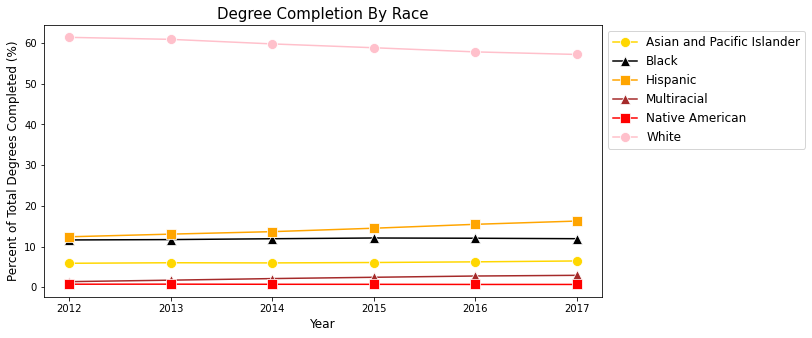

In [224]:
#Create Line Plot

#Create List and Dictionaries

racelist = sorted(['White', 'Hispanic', 'Black', 'Multiracial','Native American', 'Asian and Pacific Islander'])
LineColor = {'Native American':'Red', 'Asian and Pacific Islander': 'Gold', 'Black':'Black',
             'Hispanic':'Orange', 'White': 'Pink', 'Multiracial': 'Brown'}
LineMarker = {'Native American':'s', 'Asian and Pacific Islander': 'o', 'Black':'^',
             'Hispanic':'s', 'White': 'o', 'Multiracial': '^'}

#Create Plot Function
def educationplot(racelist):
    for race in racelist:
        sns.lineplot(data = education[education.Race == race], x = 'Year', y = 'PercentofTotalDegrees', label = race,\
                     c= LineColor[race], marker = LineMarker[race], markersize = 10 )
    plt.legend(loc ='upper left', bbox_to_anchor = (1,1), prop = {'size': 12})
    plt.title("Degree Completion By Race", fontsize = 15)
    plt.ylabel('Percent of Total Degrees Completed (%)', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    plt.ylim = (0,30)
    plt.show

plt.rcParams['figure.figsize'] = (10,5)
    
educationplot(racelist)

In [225]:
education.columns

Index(['Race', 'Year', 'DegreesCompleted', 'PercentofTotalDegrees'], dtype='object')

In [228]:
#Change Column Names Again For Export to be joined with other dataframes in SQL
education.columns = ['Race', 'Year', 'Degrees Completed', 'Percent of Total Degrees']
education.head(6)

,Race,Year,Degrees Completed,Percent of Total Degrees
1,Black,2017,576612,11.93
3,Hispanic,2017,786273,16.26
4,Multiracial,2017,141479,2.93
5,Native American,2017,33272,0.69
6,White,2017,2765344,57.19
8,Black,2016,576255,12.04


In [229]:
#Export education Data Frame as a CSV
#education.to_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2012-2017_Degrees_Completed_By_Race.csv')